# Pymaceuticals Inc.
---

### Analysis

1. This data shows that the most effective drug regimens are Capomulin and Ramicane, indicated by the lowest final tumor volumes in the box plots below. 

2. The study has roughly equal numbers of males and females, as shown in the pie chart below, suggesting a good gender balance amongst the study participants.

3. There is a positive correlation between mouse weight and tumor volume, implying that as the mouse weight increases so does the tumor volume. This can be seen in the scatter plots below. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(mouse_study.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
number_mice = mouse_study['Mouse ID'].nunique()
print(number_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mice)

['g989']


In [4]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)]
print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[~mouse_study['Mouse ID'].isin(duplicate_mice)]
print(clean_mouse_study.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mouse_study['Mouse ID'].nunique()
print(num_mice_clean)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by the 'Drug Regimen' column
grouped_df = clean_mouse_study.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std_dev = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

# Display the summary DataFrame
print(summary_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_df)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

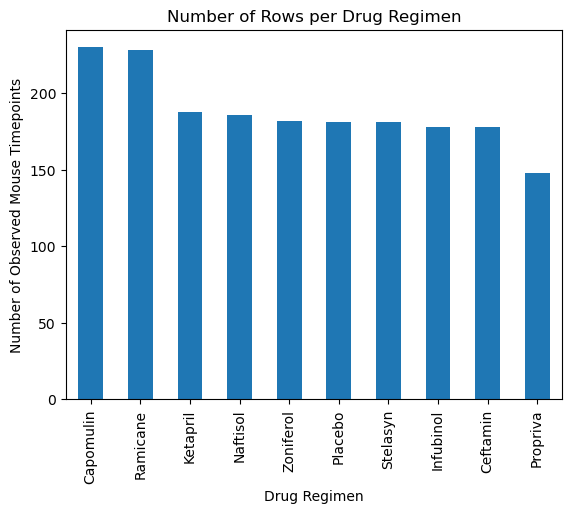

In [9]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_mouse_study['Drug Regimen'].value_counts()

# Generate a bar plot using pandas
drug_regimen_counts.plot(kind='bar', title='Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.show()

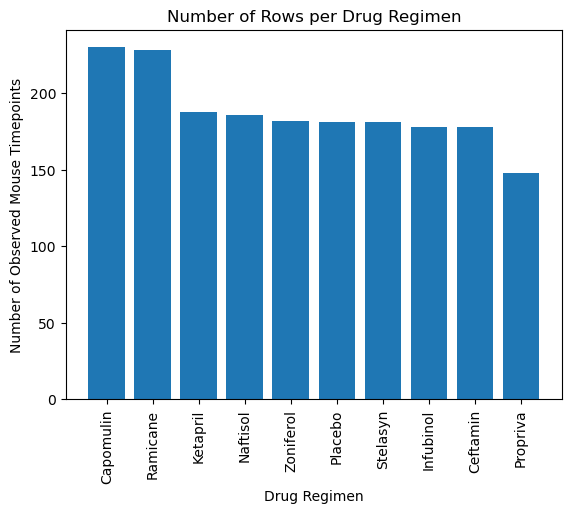

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the names of the drug regimens and the counts
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Generate a bar plot using pyplot
plt.bar(drug_regimens, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Number of Rows per Drug Regimen')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot 
plt.show()

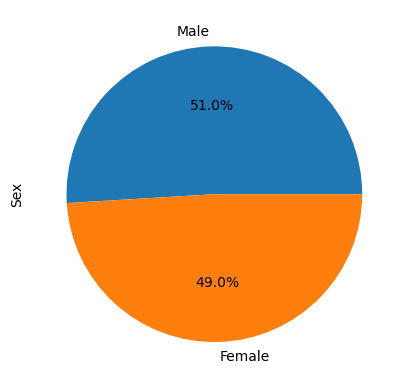

In [11]:
# Count the number of female and male mice
sex_counts = clean_mouse_study['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts.plot(kind='pie', autopct='%1.1f%%')

# Show the plot
plt.show()

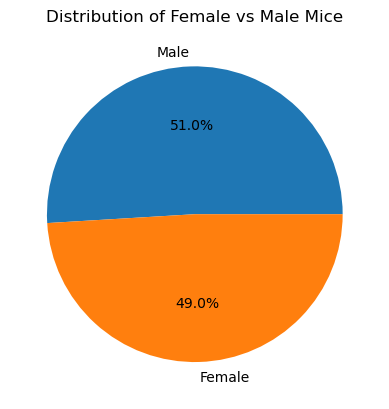

In [12]:
# Count the number of female and male mice
sex_counts = clean_mouse_study['Sex'].value_counts()

# Get the labels and sizes for the pie chart
labels = sex_counts.index
sizes = sex_counts.values

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(clean_mouse_study, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to only include the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(treatments)]

print(final_tumor_volume)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
238     y769         45     Ceftamin  Female           6          27   
239     y793         45    Capomulin    Male          17          17   
240     y865         45     Ceftamin    Male          23          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


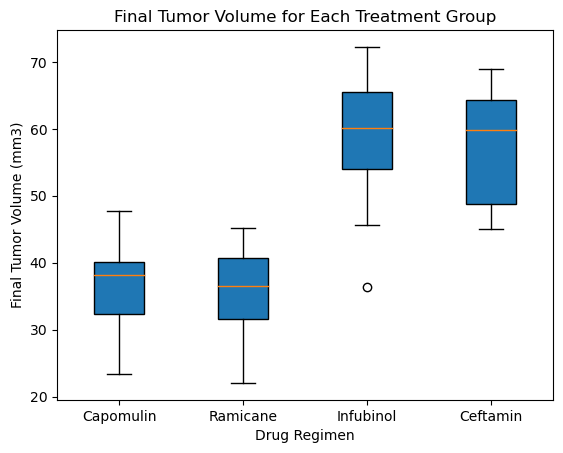

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Each Treatment Group')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

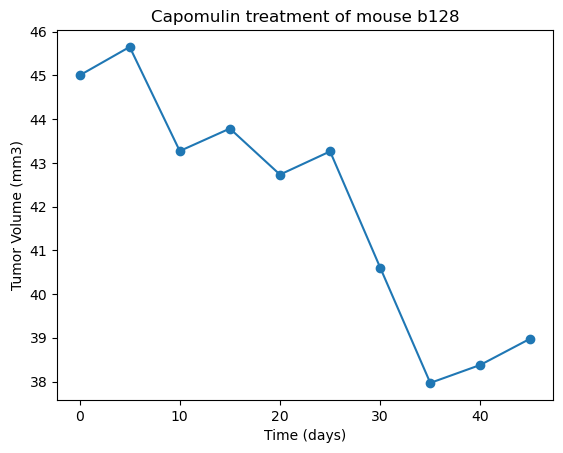

In [16]:
# Filter the data for a single mouse treated with Capomulin
mouse_data = clean_mouse_study.loc[(clean_mouse_study['Drug Regimen'] == 'Capomulin') & (clean_mouse_study['Mouse ID'] == 'b128')]

# Generate a line plot of tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")

# Display plot
plt.show()

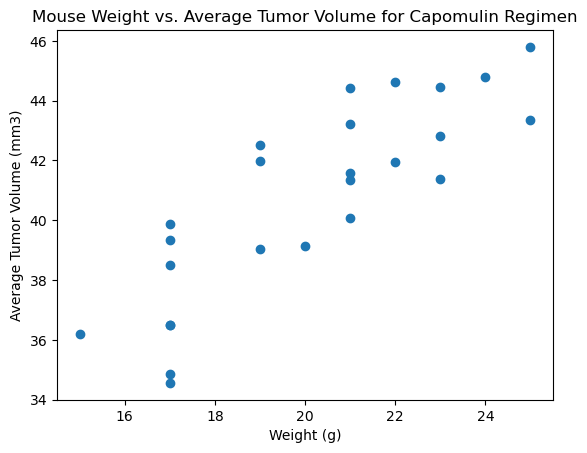

In [19]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


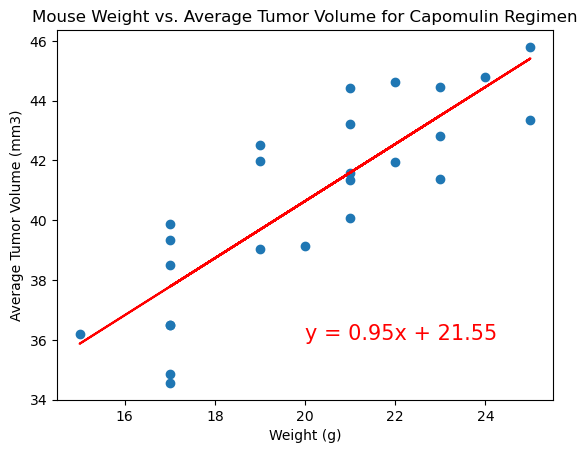

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume
correlation = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression model for mouse weight and average tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
regress_values = average_tumor_volume['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume['Weight (g)'],regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display plot
plt.show()